#**About Dataset**
The Fish Species Prediction dataset is designed to facilitate the identification and classification of fish species based on various physical characteristics. This dataset includes key feature variables such as **Weight**, **Height**, **Width**, and three different measurements of length: **Length1**, **Length2**, and **Length3**. These features capture the essential dimensions and mass of individual fish, which are critical for distinguishing between species.

**Weight** represents the mass of the fish, typically measured in grams, and provides an essential indicator of the fish's overall size. The **Height** and **Width** variables describe the vertical and horizontal dimensions of the fish's body, respectively. The three length measurements, **Length1**, **Length2**, and **Length3**, correspond to different axes or parts of the fish's body, offering a more detailed understanding of its shape and size.

This dataset is particularly valuable for applications in marine biology, ecology, and the fishing industry, where accurate species identification is crucial for monitoring fish populations, ensuring sustainable fishing practices, and conducting ecological research. By analyzing the relationships between these features, machine learning models can be trained to predict the species of fish, aiding in efficient and accurate species classification.

In [344]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Libraries and Dataset**

In [345]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)

df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Fish.csv")
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


In [346]:
df.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

#**Descibing the dataset**

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [348]:
df.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


#**Preprocessing as per requirement**

##**Visualizing the outliers in dataset**

<Axes: ylabel='Weight'>

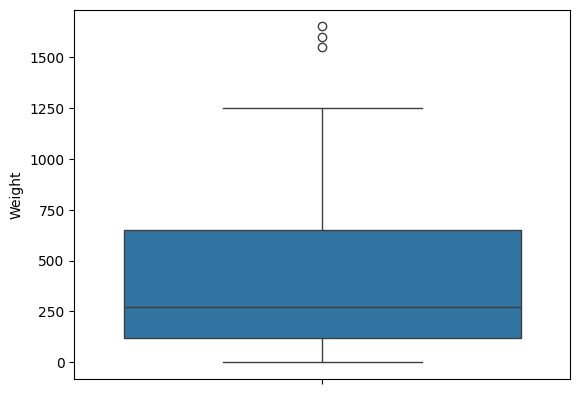

In [349]:
import seaborn as sns
sns.boxplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Density'>

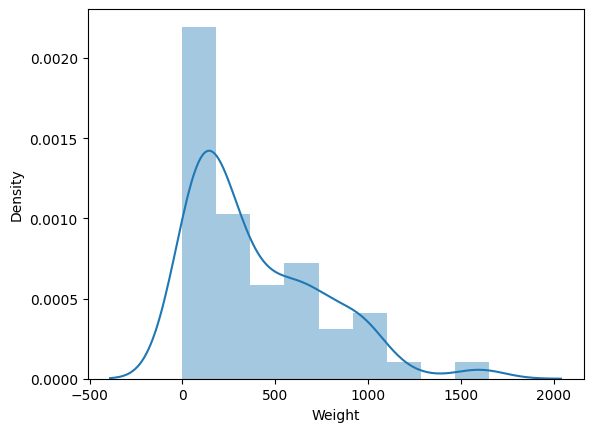

In [350]:
sns.distplot(df['Weight'])

In [351]:
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['Weight'] = np.where(df['Weight'] > max, max, np.where(df['Weight'] < min, min, df['Weight']))
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


<Axes: ylabel='Weight'>

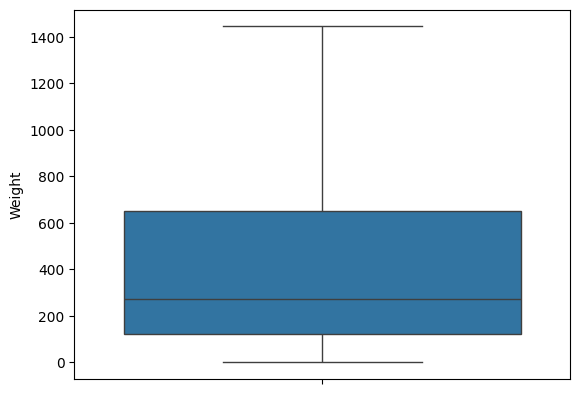

In [352]:
sns.boxplot(df['Weight'])

<Axes: ylabel='Length1'>

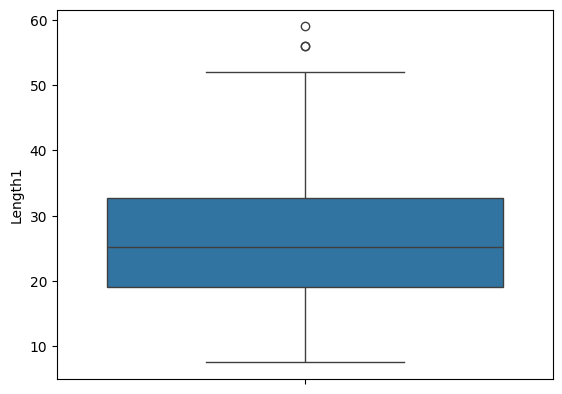

In [353]:
sns.boxplot(df['Length1'])

<Axes: xlabel='Length1', ylabel='Density'>

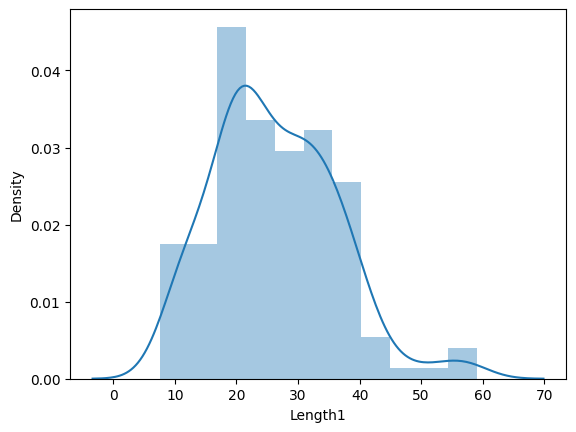

In [354]:
sns.distplot(df['Length1'])

In [355]:
q1 = df['Length1'].quantile(0.25)
q3 = df['Length1'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['Length1'] = np.where(df['Length1'] > max, max, np.where(df['Length1'] < min, min, df['Length1']))
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


<Axes: ylabel='Length1'>

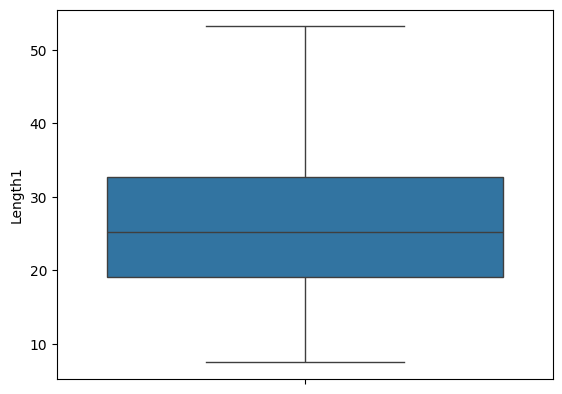

In [356]:
sns.boxplot(df['Length1'])

<Axes: ylabel='Length2'>

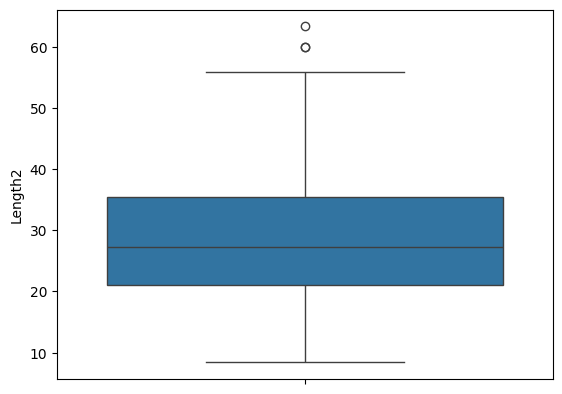

In [357]:
sns.boxplot(df['Length2'])

<Axes: xlabel='Length2', ylabel='Density'>

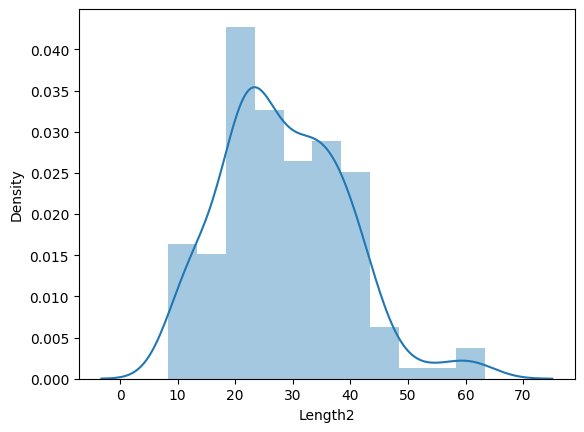

In [358]:
sns.distplot(df['Length2'])

In [359]:
q1 = df['Length2'].quantile(0.25)
q3 = df['Length2'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['Length2'] = np.where(df['Length2'] > max, max, np.where(df['Length2'] < min, min, df['Length2']))
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


<Axes: ylabel='Length2'>

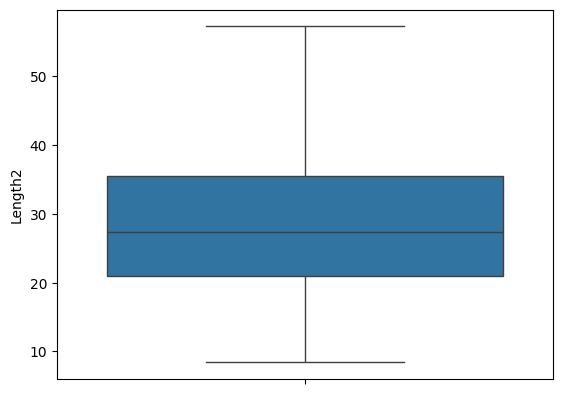

In [360]:
sns.boxplot(df['Length2'])

In [361]:
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


##**Visualizing the missing values in dataset (if any)**

<Axes: >

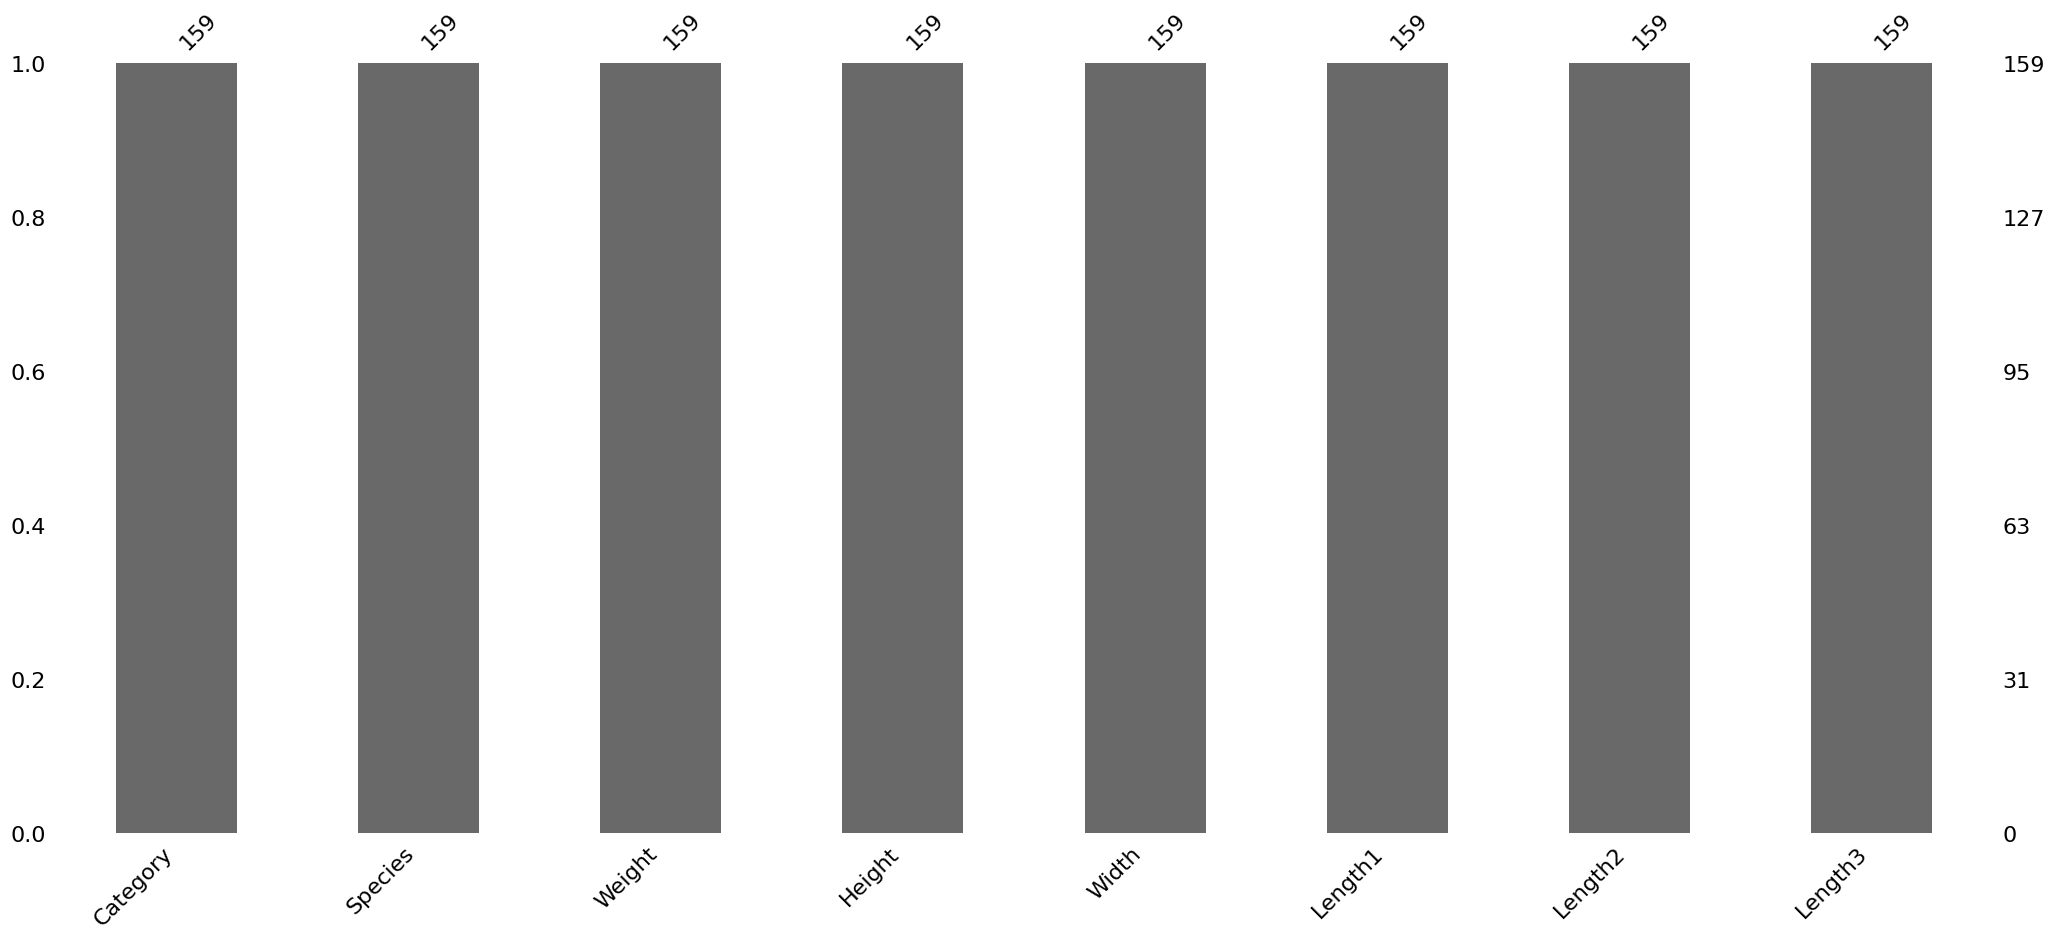

In [362]:
import missingno as msno
msno.bar(df)

In [363]:
df.isna().sum()

,0
Category,0
Species,0
Weight,0
Height,0
Width,0
Length1,0
Length2,0
Length3,0


##**Checking for duplicate values**

In [364]:
df.duplicated().sum()

1

In [365]:
df.drop_duplicates(inplace=True)

In [366]:
df.duplicated().sum()

0

#**Preprocessed Dataset**

In [367]:
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


#**Defining target variable(y) and feature variable(x)**

In [368]:
df.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [369]:
y = df['Category']
x = df[['Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3']]

In [370]:
y.value_counts()

,count
Category,
3,56
1,35
5,20
4,16
6,14
2,11
7,6


#**Imbalanced Dataset**

##**Train-Test Split**

In [371]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.6, random_state=2529 )

##**Model Selection**

In [372]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

##**Training the model**

In [373]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

##**Testing the model**

In [374]:
y_pred = rfc.predict(x_test)

##**Calculating the metrics**

In [375]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  1,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  7,  0,  1,  0,  1],
       [ 0,  0,  2,  0,  0,  6,  0],
       [ 0,  0,  1,  0,  0,  0,  0]])

In [376]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         2
           3       0.67      0.95      0.78        21
           4       1.00      1.00      1.00         8
           5       0.50      0.11      0.18         9
           6       1.00      0.75      0.86         8
           7       0.00      0.00      0.00         1

    accuracy                           0.81        64
   macro avg       0.74      0.69      0.69        64
weighted avg       0.80      0.81      0.78        64



#**Balanced Dataset**

In [377]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [378]:
x_ros, y_ros = ros.fit_resample(x, y)

In [379]:
y_ros.value_counts()

,count
Category,
1,56
5,56
7,56
2,56
3,56
4,56
6,56


In [380]:
x_ros.shape

(392, 6)

##**Train-Test Split**

In [381]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, train_size=0.6, random_state=2529)

##**Model Selection**

In [387]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

##**Training the model**

In [388]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

##**Testing the model**

In [389]:
y_pred = rfc.predict(x_test)

##**Calculating the metrics**

In [390]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[24,  0,  0,  0,  0,  0,  3],
       [ 0, 17,  0,  0,  0,  0,  0],
       [ 1,  0, 13,  0,  7,  0,  2],
       [ 0,  0,  0, 21,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0, 22]])

In [391]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.89      0.92        27
           2       1.00      1.00      1.00        17
           3       1.00      0.57      0.72        23
           4       1.00      1.00      1.00        21
           5       0.80      1.00      0.89        28
           6       1.00      1.00      1.00        19
           7       0.81      1.00      0.90        22

    accuracy                           0.92       157
   macro avg       0.94      0.92      0.92       157
weighted avg       0.93      0.92      0.91       157

